In [1]:
# Author: Yichun Zhao

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Flatten
import numpy as np
import matplotlib.pyplot as plt


-----------------------DATA PROCESSING-----------------------

Samples of input images:


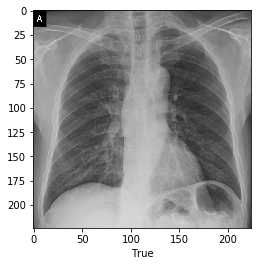

[[ 70   0   0 ...  65  69  68]
 [ 75   0   0 ...  75  73  73]
 [ 75   0   0 ...  83  81  82]
 ...
 [145  96 107 ...  82  63  54]
 [143  98 105 ...  79  60  53]
 [140  94 107 ...  77  60  51]]


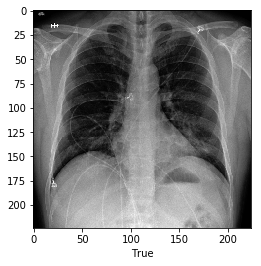

[[53 53 53 ... 53 53 53]
 [53 53 53 ... 53 53 53]
 [53 53 53 ... 53 53 53]
 ...
 [53 53 53 ... 53 53 53]
 [53 53 53 ... 53 53 53]
 [53 53 53 ... 53 53 53]]


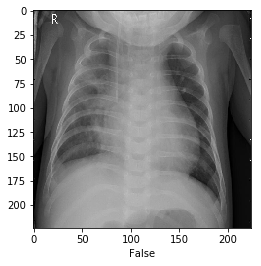

[[117  72  88 ...  46  40  13]
 [124  94 109 ...  54  41   6]
 [112  81 134 ...  49  47  22]
 ...
 [ 49  56  21 ...  12  13  13]
 [ 55  57  19 ...  12  13  13]
 [ 77  50  22 ...  12  13  13]]


In [2]:
# importing data
print("\n-----------------------DATA PROCESSING-----------------------\n")
import os
import imutils
import cv2

images = []
labels = []

yes_path = os.path.abspath('')+"/dataset/train_test/yes/"
for file in os.listdir(yes_path):
    image = cv2.imread(yes_path+file, cv2.IMREAD_GRAYSCALE)
    # resize images to same size
    image = cv2.resize(image, (224, 224))
    images.append(image)
    labels.append(True)
    
no_path = os.path.abspath('')+"/dataset/train_test/no/"
for file in os.listdir(no_path):
    image = cv2.imread(no_path+file, cv2.IMREAD_GRAYSCALE)
    # resize images to same size
    image = cv2.resize(image, (224, 224))
    images.append(image)
    labels.append(False)

# visualize input images
print("Samples of input images:")
import random
for i in random.sample(range(0, 50), 3):
    plt.imshow(images[i], cmap='gray')
    plt.xlabel(labels[i])
    plt.show()
    print(images[i])

# normalize and reshape into appropriate dimensions
images = np.array(images)/255
images = images.reshape(images.shape[0], images.shape[1], images.shape[2], 1) #TF needs 4D shaped data
labels = np.array(labels) * 1
labels = labels.reshape(labels.shape[0], -1) #2D output data

In [3]:
# k fold cross validation
from sklearn.model_selection import KFold

k = 10
kf = KFold(n_splits=k, shuffle=True)

# build neural net
print("\n-----------------------BUILDING NEURAL NET-----------------------\n")

# build CNN with reference to the AlexNet architecture
# refer to https://www.nature.com/articles/s41598-019-42557-4
model = keras.models.Sequential()
# conv layer 1 with 16 3x3 filters with padding
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
# normalize batch after activation to improve computing time
model.add(BatchNormalization())
# max pool 1
model.add(MaxPooling2D((2, 2),strides=2))
# conv layer 2 with 32 3x3 filters
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
# normalize batch
model.add(BatchNormalization())
# max pool 2
model.add(MaxPooling2D((2, 2),strides=2))
model.add(Flatten())
# hidden layer
model.add(Dense(128, activation='relu'))
# normalize batch
model.add(BatchNormalization())
# output layer for binary output
model.add(Dense(1, activation='sigmoid'))
    
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

print("\n-----------------------TRAINING MODEL-----------------------\n")

fold_num = 1
for train, test in kf.split(images, labels):
    print("Training for fold ", fold_num, "...\n")
    # within each fold, we train and test our network
    
    model.fit(images[train], labels[train], epochs=5, batch_size=9)
    
    test_loss, test_acc, test_prec, test_rec = model.evaluate(images[test], labels[test])
    print("\nLoss from testing: ", test_loss, "")
    print("Accuracy from testing: ", test_acc, "")
    print("Precision from testing: ", test_prec, "")
    print("Recall from testing: ", test_rec, "\n")
    
    fold_num = fold_num+1



-----------------------BUILDING NEURAL NET-----------------------


-----------------------TRAINING MODEL-----------------------

Training for fold  1 ...

Epoch 1/5
5/5 [==============================] - 2s 464ms/step - loss: 0.2907 - accuracy: 0.8444 - precision: 0.8636 - recall: 0.8261
Epoch 2/5
5/5 [==============================] - 2s 406ms/step - loss: 0.0668 - accuracy: 0.9778 - precision: 1.0000 - recall: 0.9565
Epoch 3/5
5/5 [==============================] - 2s 432ms/step - loss: 0.0209 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000
Epoch 4/5
5/5 [==============================] - 2s 471ms/step - loss: 0.0443 - accuracy: 0.9778 - precision: 0.9583 - recall: 1.0000
Epoch 5/5
1/1 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.8000 - precision: 0.6667 - recall: 1.0000

Loss from testing:  0.6950386166572571 
Accuracy from testing:  0.800000011920929 
Precision from testing:  0.6666666865348816 
Recall from testing:  1.0 

Training for fold 

5/5 [==============================] - 2s 494ms/step - loss: 0.0067 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000
Epoch 4/5
5/5 [==============================] - 2s 462ms/step - loss: 4.0751e-04 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000
Epoch 5/5
1/1 [==============================] - 0s 2ms/step - loss: 0.0098 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000

Loss from testing:  0.009790122509002686 
Accuracy from testing:  1.0 
Precision from testing:  1.0 
Recall from testing:  1.0 

Training for fold  10 ...

Epoch 1/5
5/5 [==============================] - 2s 464ms/step - loss: 0.0029 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000
Epoch 2/5
5/5 [==============================] - 2s 412ms/step - loss: 1.1295e-04 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000
Epoch 3/5
5/5 [==============================] - 2s 413ms/step - loss: 0.0016 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000
Epoch 4/5
5/5 [============================

In [4]:
print("\n-----------------------SUMMARY-----------------------\n")
model.summary()

# model visualization
# from tensorflow.keras.utils import plot_model
# plot_model(model, to_file='model.png')


-----------------------SUMMARY-----------------------

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      160       
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 112, 112, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________


In [5]:
# save keras model
model.save(os.path.abspath('')+"/model")

# save to tfjs model for web app
# import tensorflowjs as tfjs
# tfjs.converters.save_keras_model(model, os.path.abspath('')+"/webapp/tfjs_model")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: C:\Users\Yichun\Documents\UVic\2020 Fall\HINF 491\covid19-ai-cnn-classifier/model\assets
